In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# === Cargar dataset ===
df = pd.read_csv("../data/aptos_bogota_imputed.csv")
target = "precio_venta"

# === Definir umbral de NaNs aceptable (porcentaje) ===
nan_threshold = 0.05  # Máximo 5% de valores faltantes permitidos
n_rows = len(df)

# === Detectar columnas con NaNs excesivos ===
na_counts = df.isna().sum()
na_ratio = na_counts / n_rows
cols_to_use = na_ratio[na_ratio <= nan_threshold].index.tolist()

# Asegurar que 'precio_venta' esté fuera
if target in cols_to_use:
    cols_to_use.remove(target)

print(f"Variables usadas en fase 1 ({len(cols_to_use)}): {cols_to_use}")
print(f"Variables ignoradas ({len(df.columns) - len(cols_to_use) - 1}): {set(df.columns) - set(cols_to_use) - {target}}")

# === Subconjunto limpio ===
X = df[cols_to_use]
y = df[target]

# === Detección de tipo ===
categorical = X.select_dtypes(include=["object", "bool"]).columns.tolist()
numerical = X.select_dtypes(include=["number"]).columns.tolist()

# === Preprocesamiento con imputación explícita (por seguridad) ===
preprocessor = ColumnTransformer([
    ("num", make_pipeline(SimpleImputer(strategy="mean"), StandardScaler()), numerical),
    ("cat", make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")), categorical)
])

# === Modelos base ===
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1, max_iter=10000),
    "Ridge": Ridge(alpha=1.0),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(C=1.0, epsilon=0.2),
    "XGBoost": XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# === Validación cruzada ===
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = "neg_root_mean_squared_error"
results = {}

for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scoring)
    rmse_scores = -scores
    results[name] = {
        "RMSE mean": np.mean(rmse_scores),
        "RMSE std": np.std(rmse_scores)
    }


Variables usadas en fase 1 (19): ['area', 'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector', 'estrato', 'antiguedad', 'latitud', 'longitud', 'estado', 'alarma', 'ascensor', 'conjunto_cerrado', 'gimnasio', 'piscina', 'zona_de_bbq', 'administracion_imputada', 'estrato_imputado']
Variables ignoradas (3): {'numero_piso', 'numero_closets', 'area_terraza'}


/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.701e+20, tolerance: 1.642e+18
  model = cd_fast.sparse_enet_coordinate_descent(
/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.198e+20, tolerance: 1.631e+18
  model = cd_fast.sparse_enet_coordinate_descent(
/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not conve

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 21895, number of used features: 62
[LightGBM] [Info] Start training from score 990626093.247591


/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1164
[LightGBM] [Info] Number of data points in the train set: 21895, number of used features: 62
[LightGBM] [Info] Start training from score 991564042.054168


/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1166
[LightGBM] [Info] Number of data points in the train set: 21895, number of used features: 62
[LightGBM] [Info] Start training from score 994814345.362868


/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1169
[LightGBM] [Info] Number of data points in the train set: 21895, number of used features: 63
[LightGBM] [Info] Start training from score 994285948.907056


/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 21896, number of used features: 61
[LightGBM] [Info] Start training from score 992275620.753380


/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [2]:
# === Mostrar resultados ordenados ===
results_df = pd.DataFrame(results).T.sort_values(by="RMSE mean")
print(results_df)

                     RMSE mean      RMSE std
RandomForest      2.450363e+08  7.697895e+06
XGBoost           2.452488e+08  6.392930e+06
LightGBM          2.462642e+08  4.892081e+06
KNN               3.416780e+08  5.993960e+06
DecisionTree      3.445090e+08  8.685889e+06
Ridge             3.479796e+08  4.444918e+06
LinearRegression  3.479858e+08  4.397982e+06
Lasso             3.479884e+08  4.402652e+06
SVR               9.133336e+08  5.537129e+06


| Modelo                     | RMSE medio | Observaciones clave                                                                     |
| -------------------------- | ---------- | --------------------------------------------------------------------------------------- |
| **Random Forest**          | 248M       | Mejor desempeño. Buen punto de partida.                                                 |
| **XGBoost**                | 251M       | Muy cerca del RF, pero algo más costoso en entrenamiento.                               |
| **LightGBM**               | 252M       | Similar a XGBoost, pero puede escalar mejor si el dataset crece.                        |
| **KNN**                    | 334M       | Malo para alta dimensionalidad y regresión compleja. Lo esperado.                       |
| **DecisionTree**           | 342M       | Muy limitado si no hay poda o boosting. Overfitting probable.                           |
| **Ridge / Linear / Lasso** | 348M       | No capturan relaciones no lineales. Básicos.                                            |
| **SVR**                    | **913M**   | Desastre. Escala mal, sensible al preprocesamiento y a la dimensionalidad. Inútil aquí. |


Random Forest, XGBoost, LightGBM. Tienen diferencias menores en RMSE, pero son los que se llevarán a fases posteriores.

## Importancia de variables

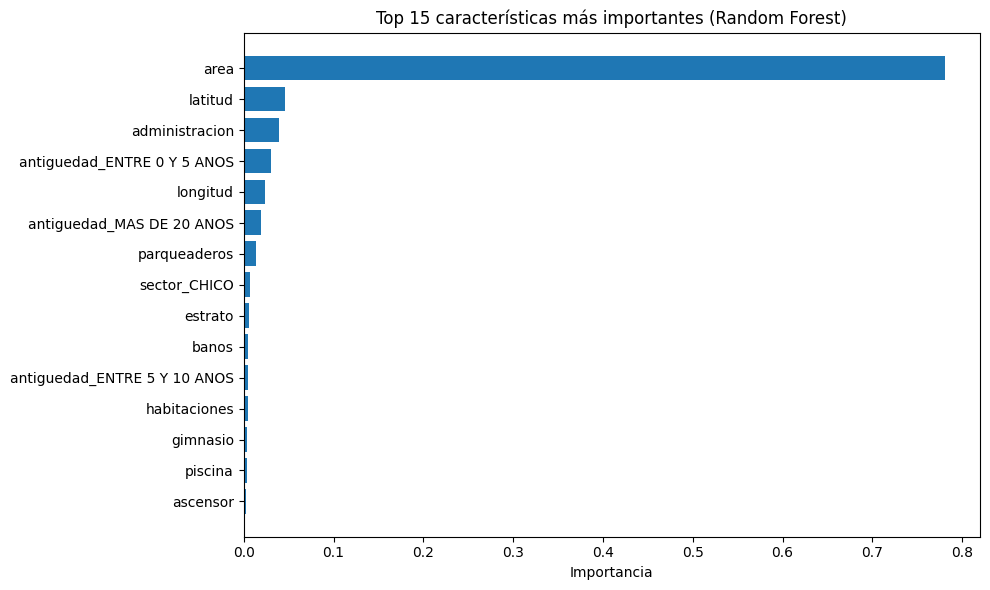

In [3]:
import matplotlib.pyplot as plt

# === Cargar y preparar datos ===
target = "precio_venta"

# === Columnas con NaN aceptables ===
nan_threshold = 0.05
n_rows = len(df)
na_ratio = df.isna().sum() / n_rows
cols_to_use = na_ratio[na_ratio <= nan_threshold].index.tolist()
if target in cols_to_use:
    cols_to_use.remove(target)

X = df[cols_to_use]
y = df[target]

categorical = X.select_dtypes(include=["object", "bool"]).columns.tolist()
numerical = X.select_dtypes(include=["number"]).columns.tolist()

# === Preprocesamiento con imputación ===
numeric_pipeline = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numerical),
    ("cat", categorical_pipeline, categorical)
])

# === Entrenar modelo para extraer importancias ===
model = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X, y)

# === Recuperar nombres de features ===
# Paso 1: entrenar solo el preprocesador para ver qué columnas genera
preprocessor.fit(X)

num_features = numerical
cat_features = model.named_steps['columntransformer'].named_transformers_['cat'].named_steps['onehotencoder'].get_feature_names_out(categorical)
feature_names = np.concatenate([num_features, cat_features])

# Paso 2: extraer importancias
importances = model.named_steps['randomforestregressor'].feature_importances_

# Paso 3: crear dataframe ordenado
importance_df_rf = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# === Graficar top N
top_n = 15
top_features = importance_df_rf.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features["feature"][::-1], top_features["importance"][::-1])
plt.xlabel("Importancia")
plt.title(f"Top {top_n} características más importantes (Random Forest)")
plt.tight_layout()
plt.show()

# === Exportar para referencia futura
importance_df_rf.to_csv("importancia_variables_rf.csv", index=False)


In [4]:
# === Cargar top variables ===
important_vars = pd.read_csv("importancia_variables_rf.csv")
top_n = 14  # puedes cambiar a 10 si quieres
top_features = important_vars["feature"].head(top_n).tolist()

# === Filtrar X con solo las top features (algunas pueden ser OneHot) ===
# Nota: Si algunas variables categóricas aún no están en df (porque se codifican), separarlas manualmente
# Para seguridad, partimos en dos: base features (antes de one-hot) y dummy features
raw_columns = df.columns.tolist()
base_features = [col for col in top_features if col in raw_columns]

X_reducido = df[base_features]

# Detectar columnas categóricas/numerical
categorical = X_reducido.select_dtypes(include=["object", "bool"]).columns.tolist()
numerical = X_reducido.select_dtypes(include=["number"]).columns.tolist()

# Preprocesador con imputación
preprocessor = ColumnTransformer([
    ("num", make_pipeline(SimpleImputer(strategy="mean"), StandardScaler()), numerical),
    ("cat", make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")), categorical)
])

# Modelos a comparar
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1, max_iter=10000),
    "Ridge": Ridge(alpha=1.0),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(C=1.0, epsilon=0.2),
    "XGBoost": XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = "neg_root_mean_squared_error"
results = {}

for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    scores = cross_val_score(pipeline, X_reducido, y, cv=cv, scoring=scoring)
    rmse_scores = -scores
    results[name] = {
        "RMSE mean": np.mean(rmse_scores),
        "RMSE std": np.std(rmse_scores)
    }


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 21895, number of used features: 10
[LightGBM] [Info] Start training from score 990626093.247591
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 21895, number of used features: 10
[LightGBM] [Info] Start training from score 991564042.054168


/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 21895, number of used features: 10
[LightGBM] [Info] Start training from score 994814345.362868


/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 21895, number of used features: 10
[LightGBM] [Info] Start training from score 994285948.907056
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 21896, number of used features: 10
[LightGBM] [Info] Start training from score 992275620.753380


/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [5]:
# Mostrar resultados
results_df = pd.DataFrame(results).T.sort_values(by="RMSE mean")
print(results_df)

                     RMSE mean      RMSE std
RandomForest      2.643497e+08  5.190702e+06
XGBoost           2.720757e+08  5.948218e+06
LightGBM          2.722698e+08  4.924209e+06
KNN               3.305623e+08  5.711069e+06
DecisionTree      3.779359e+08  8.264401e+06
Lasso             3.826606e+08  3.514223e+06
LinearRegression  3.826606e+08  3.514223e+06
Ridge             3.826606e+08  3.514643e+06
SVR               9.133332e+08  5.537095e+06


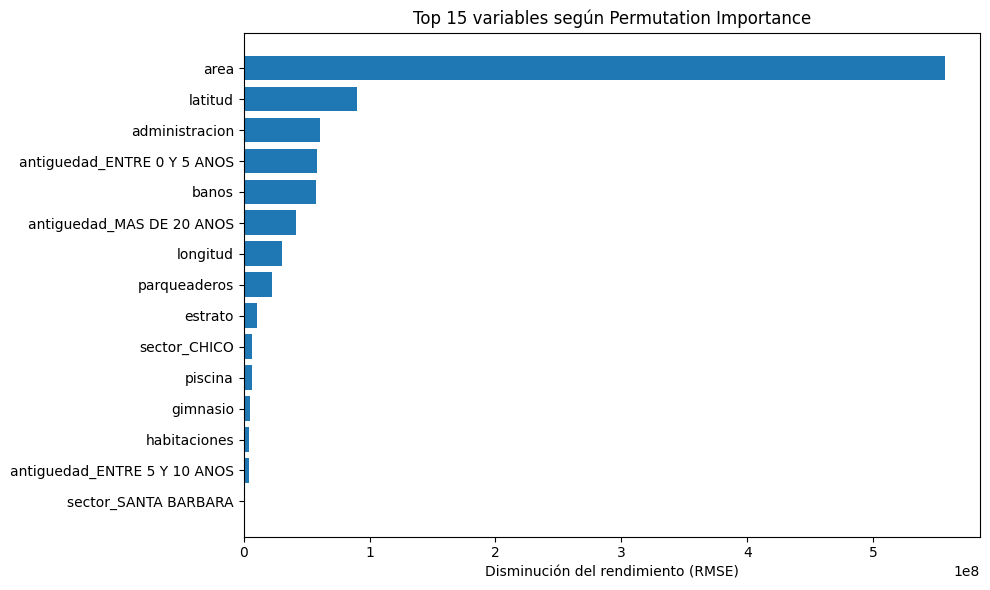

In [6]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# === Train / test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Definir columnas
categorical = X.select_dtypes(include=["object", "bool"]).columns.tolist()
numerical = X.select_dtypes(include=["number"]).columns.tolist()

# === Preprocesamiento
preprocessor = ColumnTransformer([
    ("num", make_pipeline(SimpleImputer(strategy="mean"), StandardScaler()), numerical),
    ("cat", make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")), categorical)
])

# === Modelo base
pipeline = make_pipeline(
    preprocessor,
    RandomForestRegressor(n_estimators=100, random_state=42)
)

# === Entrenamiento
pipeline.fit(X_train, y_train)

# === Permutation Importance
# Obtenemos el modelo ya entrenado
rf = pipeline.named_steps["randomforestregressor"]
X_test_preprocessed = pipeline.named_steps["columntransformer"].transform(X_test)
X_test_preprocessed = X_test_preprocessed.toarray() 

# Extraer nombres de features codificados
num_features = numerical
cat_features = pipeline.named_steps['columntransformer'].named_transformers_['cat'].named_steps['onehotencoder'].get_feature_names_out(categorical)
feature_names = np.concatenate([num_features, cat_features])

# Correr la importancia
result = permutation_importance(rf, X_test_preprocessed, y_test, n_repeats=10, random_state=42, scoring="neg_root_mean_squared_error")

# === Mostrar resultados ordenados
importance_df_permutation = pd.DataFrame({
    "feature": feature_names,
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std
}).sort_values(by="importance_mean", ascending=False)

# === Graficar top N
top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(importance_df_permutation["feature"].head(top_n)[::-1], importance_df_permutation["importance_mean"].head(top_n)[::-1])
plt.xlabel("Disminución del rendimiento (RMSE)")
plt.title(f"Top {top_n} variables según Permutation Importance")
plt.tight_layout()
plt.show()

# === Guardar resultado
importance_df_permutation.to_csv("perm_importance_rf.csv", index=False)


In [7]:
# Renombrar columnas para unir
importance_df_rf = importance_df_rf.rename(columns={"importance": "importance_rf"})
importance_df_permutation = importance_df_permutation.rename(columns={"importance_mean": "importance_perm"})

# Unir los dos DataFrames por nombre de la variable
df_combined = pd.merge(importance_df_rf, importance_df_permutation, on="feature", how="inner")

# Calcular ranking de cada tipo (menor es mejor)
df_combined["rank_rf"] = df_combined["importance_rf"].rank(ascending=False)
df_combined["rank_perm"] = df_combined["importance_perm"].rank(ascending=False)

# Score combinado: suma de los dos rankings
df_combined["combined_score"] = df_combined["rank_rf"] + df_combined["rank_perm"]

# Ordenar por el ranking combinado
df_combined_sorted = df_combined.sort_values(by="combined_score").reset_index(drop=True)

df_combined_sorted

,feature,importance_rf,importance_perm,importance_std,rank_rf,rank_perm,combined_score
0,area,7.808512e-01,5.570544e+08,6.649223e+06,1.0,1.0,2.0
1,latitud,4.624507e-02,9.027359e+07,2.597248e+06,2.0,2.0,4.0
2,administracion,3.947034e-02,6.050137e+07,2.548255e+06,3.0,3.0,6.0
3,antiguedad_ENTRE 0 Y 5 ANOS,3.001961e-02,5.813054e+07,5.209222e+06,4.0,4.0,8.0
4,longitud,2.339650e-02,3.006852e+07,2.328728e+06,5.0,7.0,12.0
...,...,...,...,...,...,...,...
120,sector_TINTAL SUR,1.078065e-08,-2.452676e+00,5.911954e-01,107.0,112.0,219.0
121,sector_TINTAL NORTE,7.891176e-09,-7.050772e-01,2.835263e-01,112.0,109.0,221.0
122,sector_DANUBIO,6.665481e-09,-4.483097e+00,7.203294e-01,114.0,113.0,227.0
123,sector_VENECIA,9.997805e-10,-2.962404e-01,0.000000e+00,123.0,106.0,229.0


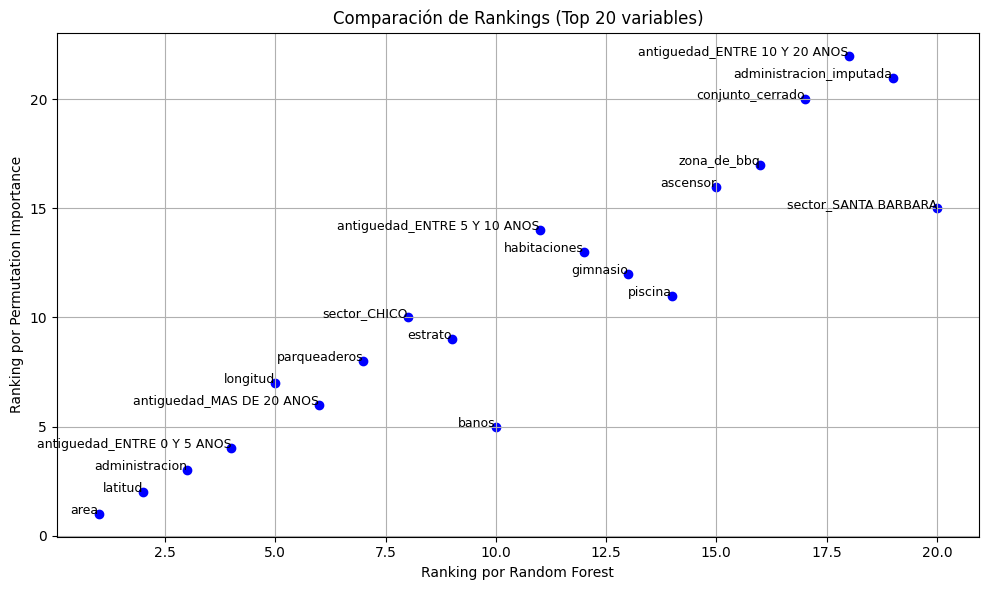

In [8]:

# Filtra las top-N variables según el ranking combinado
top_n = 20
df_plot = df_combined_sorted.head(top_n)

plt.figure(figsize=(10, 6))
plt.scatter(df_plot["rank_rf"], df_plot["rank_perm"], color="blue")

# Etiquetas de las variables en el gráfico
for _, row in df_plot.iterrows():
    plt.text(row["rank_rf"], row["rank_perm"], row["feature"], fontsize=9, ha='right')

plt.xlabel("Ranking por Random Forest")
plt.ylabel("Ranking por Permutation Importance")
plt.title(f"Comparación de Rankings (Top {top_n} variables)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Análisis Comparativo de Rankings de Importancia de Variables
Con el fin de evaluar la robustez y consistencia de la selección de variables, se compararon dos métodos diferentes de estimación de importancia: Feature Importance de Random Forest (basado en reducción de impureza) y Permutation Importance (basado en impacto sobre el error del modelo).

La Figura muestra la comparación entre ambos rankings para las 20 variables más relevantes según un puntaje combinado. Cada punto representa una variable, posicionada en función de su ranking en Random Forest (eje X) y Permutation Importance (eje Y). Un alineamiento diagonal indica consenso entre ambos métodos.

#### Hallazgos principales:
Variables con alta consistencia:
Variables como area, latitud, estrato, longitud, parqueaderos, antiguedad_MAS DE 20 ANOS y antiguedad_ENTRE 0 Y 5 ANOS se ubicaron cerca de la diagonal, lo que indica un alto consenso entre ambos métodos. Estas variables pueden considerarse estables y confiables como predictoras del precio de venta.

#### Discrepancias notables:

banos presenta una puntuación alta en Random Forest pero una mucho menor en Permutation Importance. Esto sugiere que aunque reduce impureza en los árboles, su impacto real sobre el error del modelo es más limitado.

Por el contrario, variables como estado_REMODELADO, sector_SANTA BARBARA y conjunto_cerrado tienen baja importancia para Random Forest pero una importancia relativamente más alta cuando se evalúa el impacto real en el error del modelo. Esto indica que pueden tener efectos que se diluyen en un bosque, pero que afectan de forma concreta la predicción final.

#### Variables estructurales vs contextuales:
Las variables estructurales (como area, habitaciones, banos, antiguedad) tienden a mostrar mayor consistencia, mientras que las variables contextuales (sector, estado, amenidades) muestran mayor variabilidad entre métodos. Esto podría estar relacionado con su carácter categórico o con efectos más localizados.

#### Implicaciones para el modelo:
* Priorizar variables con alta consistencia como area, estrato, latitud, antiguedad y parqueaderos en el entrenamiento y en la interfaz de usuario de la aplicación.
* Evaluar con más detalle las variables con discrepancia, especialmente aquellas con alta Permutation Importance, para no descartarlas prematuramente.
* Este análisis valida la necesidad de usar múltiples técnicas de selección de variables para evitar sesgos del modelo subyacente.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

final_features = [
    'area',
    'estrato',
    'banos',
    'habitaciones',
    'parqueaderos',
    'latitud',
    'longitud',
    'antiguedad',
    'estado',
    'conjunto_cerrado',
    'sector'
]
X = df[final_features].copy()
y = np.log1p(df["precio_venta"])  # log-transformación del target

# === Aplicar log a 'area'
X["area"] = np.log1p(X["area"])

# === Definir columnas
categorical = X.select_dtypes(include=["object", "bool"]).columns.tolist()
numerical = X.select_dtypes(include=["number"]).columns.tolist()

# === Preprocesador
preprocessor = ColumnTransformer([
    ("num", make_pipeline(SimpleImputer(strategy="mean"), StandardScaler()), numerical),
    ("cat", make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")), categorical)
])

# === Modelos a probar
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "KNN": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(C=1.0),
    "XGBoost": XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# === Validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    
    # Cross-validated predictions
    y_pred_log = cross_val_predict(pipeline, X, y, cv=cv)
    
    # Transformar de vuelta a escala original
    y_true = np.expm1(y)
    y_pred = np.expm1(y_pred_log)

    # Métricas en escala real
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    results[name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2,
        "MAPE (%)": mape
    }


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 21895, number of used features: 55
[LightGBM] [Info] Start training from score 20.388814


/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 21895, number of used features: 55
[LightGBM] [Info] Start training from score 20.390847


/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 893
[LightGBM] [Info] Number of data points in the train set: 21895, number of used features: 55
[LightGBM] [Info] Start training from score 20.394298


/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 21895, number of used features: 56
[LightGBM] [Info] Start training from score 20.395125


/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 21896, number of used features: 54
[LightGBM] [Info] Start training from score 20.391533


/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [10]:
# === Mostrar resultados
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")
print(results_df)

                          RMSE           MAE        R²   MAPE (%)
RandomForest      2.537719e+08  1.305818e+08  0.913868  11.770715
LightGBM          2.628684e+08  1.428318e+08  0.907582  13.055433
XGBoost           2.648373e+08  1.427854e+08  0.906192  12.987614
SVR               2.823559e+08  1.511816e+08  0.893371  13.484659
KNN               3.263718e+08  1.764532e+08  0.857536  16.026450
DecisionTree      3.469308e+08  1.702991e+08  0.839022  15.453658
LinearRegression  3.773368e+08  1.718963e+08  0.809569  15.650944
Ridge             3.784515e+08  1.719427e+08  0.808442  15.652849
Lasso             5.174799e+08  2.488782e+08  0.641849  23.707567


In [11]:
# === Cargar y preparar datos ===
final_features = [
    'area',
    'estrato',
    'banos',
    'habitaciones',
    'parqueaderos',
    'latitud',
    'longitud',
    'antiguedad',
    'estado',
    'conjunto_cerrado',
    'sector'
]

X = df[final_features].copy()
y = np.log1p(df["precio_venta"])  # log-transformación del target
X["area"] = np.log1p(X["area"])   # log-transformación del área

# === Split final con hold-out (20%) ===
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Preprocesamiento
categorical = X.select_dtypes(include=["object", "bool"]).columns.tolist()
numerical = X.select_dtypes(include=["number"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", make_pipeline(SimpleImputer(strategy="mean"), StandardScaler()), numerical),
    ("cat", make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")), categorical)
])

# === Modelo final
model = RandomForestRegressor(n_estimators=100, random_state=42)
pipeline = make_pipeline(preprocessor, model)

# === Entrenamiento
pipeline.fit(X_train, y_train)

# === Predicción y evaluación en hold-out
y_pred_log = pipeline.predict(X_holdout)
y_pred = np.expm1(y_pred_log)
y_real = np.expm1(y_holdout)

# === Métricas personalizadas
errores = y_pred - y_real
abs_errores = np.abs(errores)

info_modelo = {
    "rmse": float(mean_squared_error(y_real, y_pred) ** 0.5),
    "mae": float(mean_absolute_error(y_real, y_pred)),
    "r2": float(r2_score(y_real, y_pred)),
    "error_80_percentil": float(np.percentile(abs_errores, 80)),
    "error_95_percentil": float(np.percentile(abs_errores, 95)),
    "min_predicho": float(y_pred.min()),
    "max_predicho": float(y_pred.max())
}

# === Mostrar métricas del modelo final en hold-out ===
print("\n=== Métricas del modelo final (RandomForest, hold-out set) ===")
print(f"RMSE                : ${info_modelo['rmse']:,.0f}")
print(f"MAE                 : ${info_modelo['mae']:,.0f}")
print(f"R²                  : {info_modelo['r2']:.4f}")
print(f"Error 80 percentil  : ${info_modelo['error_80_percentil']:,.0f}")
print(f"Error 95 percentil  : ${info_modelo['error_95_percentil']:,.0f}")
print(f"Precio mínimo pred. : ${info_modelo['min_predicho']:,.0f}")
print(f"Precio máximo pred. : ${info_modelo['max_predicho']:,.0f}")
print("=====================================================\n")


=== Métricas del modelo final (RandomForest, hold-out set) ===
RMSE                : $250,557,758
MAE                 : $129,945,283
R²                  : 0.9151
Error 80 percentil  : $186,917,592
Error 95 percentil  : $521,612,413
Precio mínimo pred. : $87,654,070
Precio máximo pred. : $5,097,788,943



In [12]:
import os
import cloudpickle

# === Exportar modelo
columns = X_train.columns.tolist()
os.makedirs("../data/models", exist_ok=True)
file_name = "randomforest_model_base.pkl"
model_path = f"../data/models/{file_name}"

with open(model_path, "wb") as f:
    cloudpickle.dump({
        "model": pipeline,
        "info": info_modelo,
        "columns": columns
    }, f)

print(f"✅ Pipeline exportado a '{model_path}'")

✅ Pipeline exportado a '../data/models/randomforest_model_base.pkl'


### *Modelo base con variables seleccionadas y transformación logarítmica*

Con el objetivo de establecer una línea base sólida para evaluar el impacto del enriquecimiento de datos, se construyó un modelo predictivo utilizando únicamente un subconjunto reducido de variables seleccionadas por su relevancia y consistencia, tanto estadística como semántica. Este modelo servirá como punto de comparación directa frente a las versiones enriquecidas del dataset.

#### Selección de variables
La selección de variables se realizó mediante un enfoque mixto que combina criterios estadísticos, impacto predictivo y relevancia semántica. Inicialmente, se calcularon dos rankings independientes de importancia de variables:

* Feature Importance de Random Forest: basado en la reducción de impureza (Gini).
* Permutation Importance: basado en el aumento del error (RMSE) cuando se perturba cada variable individualmente.

Ambos rankings fueron normalizados y combinados mediante la suma de sus posiciones relativas, generando un score combinado que prioriza variables importantes en ambos métodos. A continuación, se seleccionaron las variables que:

Estuvieron dentro del top 15 del ranking combinado,

Mostraron consistencia entre métodos (ubicación cercana a la diagonal en la comparación de rankings),

Y tienen interpretación clara y directa para el usuario (por ejemplo, área, estrato, número de baños, etc.).

En total, se seleccionaron 11 variables finales, entre estructurales, geográficas y contextuales. La Figura 1 muestra el gráfico de comparación entre rankings y permite visualizar la coherencia entre métodos. En la Figura 2 se muestra el ranking combinado ordenado por importancia total.

Las variables utilizadas en esta fase fueron:

* `area`
* `estrato`
* `banos`
* `habitaciones`
* `parqueaderos`
* `latitud`
* `longitud`
* `antiguedad`
* `estado` (variable categórica completa)
* `conjunto_cerrado`
* `sector` (variable categórica completa)

#### Transformación logarítmica

Se aplicó una transformación logarítmica a la variable dependiente `precio_venta` y a la variable `area` usando `log1p(x)` para estabilizar la varianza y mitigar el efecto de valores extremos. Esta transformación es común en problemas de predicción de precios inmobiliarios debido a que estas variables suelen presentar una distribución sesgada hacia la derecha. Además, permite que el modelo se enfoque en la predicción proporcional (ej. “un 10% de error”) en lugar de diferencias absolutas, lo cual es más interpretable para la mayoría de usuarios.

#### Evaluación de modelos

Se compararon múltiples algoritmos de regresión utilizando validación cruzada estratificada con 5 particiones (`KFold`, con barajado aleatorio y semilla fija). Los modelos evaluados fueron:

* Regresión Lineal
* Ridge
* Lasso
* KNN Regressor
* Árbol de Decisión
* Random Forest
* Soporte Vectorial (SVR)
* XGBoost
* LightGBM

Para cada modelo se calcularon las siguientes métricas sobre la predicción des-transformada (`exp(model output)`) para conservar la interpretabilidad en unidades monetarias:

* **RMSE** (Root Mean Squared Error): métrica principal, ya que penaliza errores grandes y está en la misma escala que el precio. Es especialmente útil en problemas donde es crítico minimizar desviaciones extremas.
* **MAE** (Mean Absolute Error): para interpretar errores promedio reales.
* **R²** (Coeficiente de determinación): para medir capacidad explicativa global.
* **MAPE** (Error porcentual absoluto medio): útil para comparar desempeño relativo.

#### Resultados y modelo base

El modelo con mejor desempeño fue Random Forest, con un RMSE de 253 millones de pesos, un MAE de 130 millones y un R² de 0.91. Este resultado valida que incluso con un conjunto reducido de variables y sin enriquecimiento geoespacial o contextual, el modelo tiene una capacidad explicativa alta. Este modelo se tomará como referencia base para evaluar si la incorporación de nuevas variables derivadas de fuentes externas (como OSM o datos abiertos) mejora la predicción de manera significativa.
